In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



def show_banner(title):
    print("\n" + "="*15 + f" {title} " + "="*15)


def validate_image(img):
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a NumPy array")
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Image must be BGR with 3 channels")
    if img.dtype != np.uint8:
        raise ValueError("Image dtype must be uint8")


def display_images(images, main_title, cols=3):
    rows = int(np.ceil(len(images) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = np.array(axes).reshape(rows, cols)

    for ax in axes.ravel():
        ax.axis("off")

    for i, (title, img, mode) in enumerate(images):
        r, c = divmod(i, cols)
        if mode == "gray":
            axes[r, c].imshow(img, cmap="gray")
        else:
            axes[r, c].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[r, c].set_title(title)

    plt.suptitle(main_title, fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()



def create_fancy_canvas(width=500, height=350):
 
    canvas = np.zeros((height, width, 3), dtype=np.uint8)
    for y in range(height):
        color = 30 + int(225 * (y / height))
        canvas[y, :] = (color//2, color//3, color)

    for x in range(0, width, 40):
        thickness = 1 if x % 80 else 2
        cv2.line(canvas, (x, 0), (x, height), (200, 200, 220), thickness)


    for _ in range(8):
        center = (np.random.randint(50, width-50), np.random.randint(50, height-50))
        radius = np.random.randint(15, 40)
        color = tuple(np.random.randint(50, 255) for _ in range(3))
        cv2.circle(canvas, center, radius, color, -1)

    cv2.rectangle(canvas, (50, 220), (200, 300), (255, 0, 150), -1)
    pts = np.array([[300, 250], [400, 100], [450, 300]], np.int32)
    cv2.fillPoly(canvas, [pts], (0, 200, 255))


    text = "OpenCV Fancy Demo"
    cv2.putText(canvas, text, (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 4, cv2.LINE_AA)
    cv2.putText(canvas, text, (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 2, cv2.LINE_AA)

    return canvas



show_banner("Fancy OpenCV Demo Ready")

image = create_fancy_canvas()
validate_image(image)

print("Image Shape:", image.shape)
print("Data Type:", image.dtype)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

display_images(
    [
        ("Original Fancy Image", image, "color"),
        ("Grayscale Version", gray, "gray")
    ],
    "OpenCV Fancy Demo",
    cols=2
)



=============== Fancy OpenCV Demo Ready ===============
Image Shape: (350, 500, 3)
Data Type: uint8


Image not found. Creating demo image...
Image Shape: (300, 400, 3)


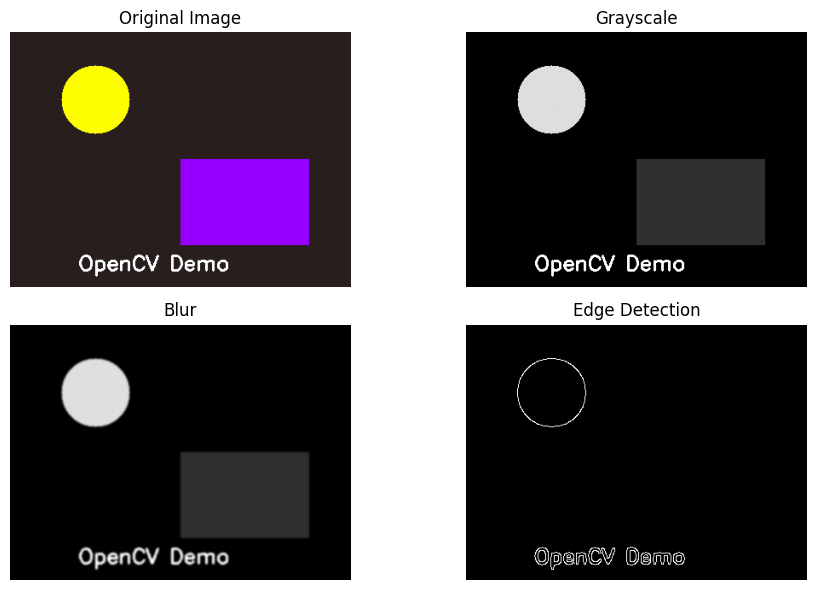

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("image.png")  

if image is None:
    print("Image not found. Creating demo image...")
    
    image = np.zeros((300, 400, 3), dtype=np.uint8)
    image[:] = (30, 30, 40)

    cv2.circle(image, (100, 80), 40, (0, 255, 255), -1)
    cv2.rectangle(image, (200, 150), (350, 250), (255, 0, 150), -1)
    cv2.putText(image, "OpenCV Demo", (80, 280),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

print("Image Shape:", image.shape)

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blur, 100, 200)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(blur, cmap="gray")
plt.title("Blur")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\DELL\Desktop\PAI lab task 5 (028)\image.png")

if image is None:
    print("Error: Main image not loaded.")
else:
    print("Main Image Loaded Successfully")
    print("Shape:", image.shape)

    parrot = np.zeros_like(image)
    cv2.ellipse(parrot, (100, 100), (30, 50), 0, 0, 360, (0,255,0), -1)
  
    cv2.circle(parrot, (100, 50), 20, (0,0,255), -1)
    cv2.polylines(parrot, [np.array([[100,50],[120,60],[100,60]])], isClosed=True, color=(0,255,255), thickness=3)
    cv2.circle(parrot, (105,45), 5, (255,255,255), -1)

    combined = cv2.addWeighted(image, 1, parrot, 1, 0)
    gray = cv2.cvtColor(combined, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    plt.figure(figsize=(12,6))

    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
    plt.title("Original + Parrot")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


Error: Main image not loaded.



==================== Read / Write / Display ====================


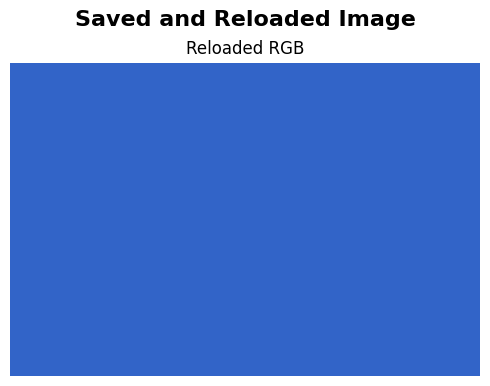

Status: image saved and loaded successfully.


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def assert_bgr_uint8(img, name="image"):
    if not isinstance(img, np.ndarray):
        raise TypeError(f"{name} must be a NumPy array")
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError(f"{name} must be BGR with 3 channels")
    if img.dtype != np.uint8:
        raise ValueError(f"{name} dtype must be uint8")


def banner(title):
    print("\n" + "="*20 + f" {title} " + "="*20)


def render_tiles(images, headline="Images", columns=2):
    rows = int(np.ceil(len(images) / columns))
    fig, axes = plt.subplots(rows, columns, figsize=(5*columns, 4*rows))
    axes = np.array(axes).reshape(rows, columns)

    for ax in axes.ravel():
        ax.axis("off")

    for i, (title, img, mode) in enumerate(images):
        r, c = divmod(i, columns)
        if mode == "gray":
            axes[r, c].imshow(img, cmap="gray")
        else:
            axes[r, c].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[r, c].set_title(title)

    plt.suptitle(headline, fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()



def persist_then_load(input_bgr, output_path="opencv_source.png"):
    assert_bgr_uint8(input_bgr, "input_bgr")

    
    ok = cv2.imwrite(output_path, input_bgr)
    if not ok:
        raise RuntimeError(f"Could not save image to {output_path}")

    loaded = cv2.imread(output_path)
    if loaded is None:
        raise RuntimeError(f"Image was saved but could not be loaded: {output_path}")
    return loaded



source_bgr = np.zeros((200, 300, 3), dtype=np.uint8)
source_bgr[:] = (50, 100, 200) 

banner("Read / Write / Display")

saved_bgr = persist_then_load(source_bgr, "opencv_source.png")

saved_rgb = cv2.cvtColor(saved_bgr, cv2.COLOR_BGR2RGB)

render_tiles(
    [("Reloaded RGB", saved_rgb, "rgb")],
    headline="Saved and Reloaded Image",
    columns=1,
)

print("Status: image saved and loaded successfully.")



==================== Resize and Crop Demo ====================


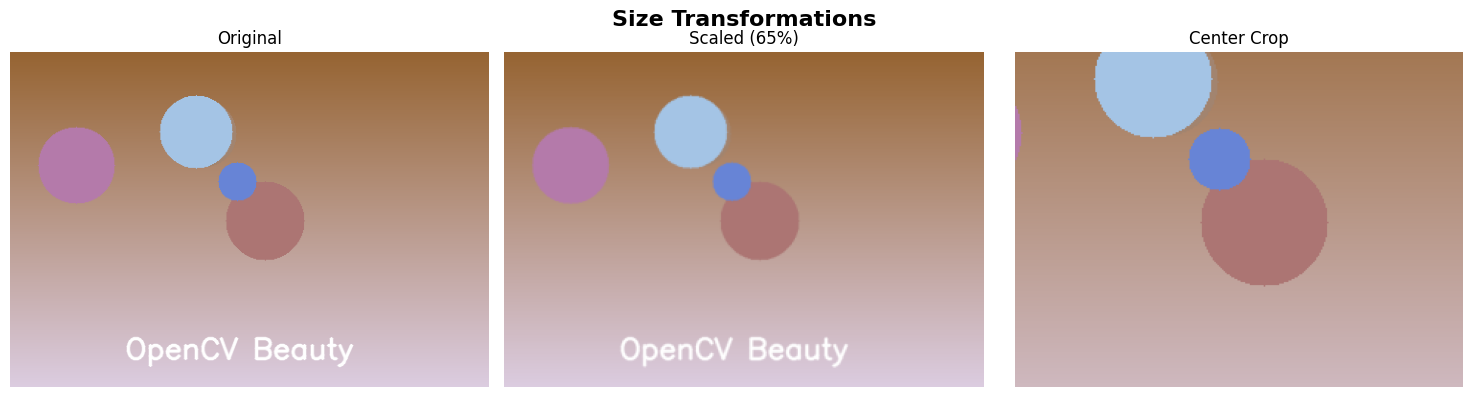

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def assert_bgr_uint8(img, name="image"):
    if not isinstance(img, np.ndarray):
        raise TypeError(f"{name} must be a NumPy array")
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError(f"{name} must be BGR with 3 channels")
    if img.dtype != np.uint8:
        raise ValueError(f"{name} dtype must be uint8")

def banner(title):
    print("\n" + "="*20 + f" {title} " + "="*20)

def render_tiles(images, headline="Images", columns=2):
    rows = int(np.ceil(len(images) / columns))
    fig, axes = plt.subplots(rows, columns, figsize=(5*columns, 4*rows))
    axes = np.array(axes).reshape(rows, columns)
    for ax in axes.ravel():
        ax.axis("off")
    for i, (title, img, mode) in enumerate(images):
        r, c = divmod(i, columns)
        if mode == "gray":
            axes[r, c].imshow(img, cmap="gray")
        else:
            axes[r, c].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[r, c].set_title(title)
    plt.suptitle(headline, fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()

def resize_percent(input_bgr, percent=70):
    assert_bgr_uint8(input_bgr, "image_data")
    if not (10 <= percent <= 300):
        raise ValueError("scale_percent must be between 10 and 300.")
    ratio = percent / 100.0
    target_w = max(1, int(input_bgr.shape[1] * ratio))
    target_h = max(1, int(input_bgr.shape[0] * ratio))
    return cv2.resize(input_bgr, (target_w, target_h), interpolation=cv2.INTER_AREA)

def crop_center_percent(input_bgr, width_pct=55, height_pct=55):
    assert_bgr_uint8(input_bgr, "image_data")
    if not (10 <= width_pct <= 100 and 10 <= height_pct <= 100):
        raise ValueError("Crop percentages must be between 10 and 100.")
    img_h, img_w = input_bgr.shape[:2]
    cut_w = int(img_w * width_pct / 100)
    cut_h = int(img_h * height_pct / 100)
    left = (img_w - cut_w) // 2
    top = (img_h - cut_h) // 2
    right = left + cut_w
    bottom = top + cut_h
    return input_bgr[top:bottom, left:right]

def create_beautiful_image(width=500, height=350):
    canvas = np.zeros((height, width, 3), dtype=np.uint8)

 
    for y in range(height):
        canvas[y, :] = (int(50 + 0.5*y), int(100 + 0.3*y), int(150 + 0.2*y))

    for i in range(5):
        center = (np.random.randint(50, width-50), np.random.randint(50, height-50))
        radius = np.random.randint(20, 50)
        color = tuple(np.random.randint(100, 255) for _ in range(3))
        cv2.circle(canvas, center, radius, color, -1)

    cv2.putText(canvas, "OpenCV Beauty", (120, height-30),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 2, cv2.LINE_AA)
    return canvas

banner("Resize and Crop Demo")

source_bgr = create_beautiful_image()
shrunk_bgr = resize_percent(source_bgr, 65)
focus_bgr = crop_center_percent(source_bgr, 58, 62)

render_tiles(
    [
        ("Original", source_bgr, "rgb"),
        ("Scaled (65%)", shrunk_bgr, "rgb"),
        ("Center Crop", focus_bgr, "rgb"),
    ],
    headline="Size Transformations",
    columns=3,
)


## 4) Transforming Color Representations

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def assert_bgr_uint8(img, name="image"):
    if not isinstance(img, np.ndarray):
        raise TypeError(f"{name} must be a NumPy array")
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError(f"{name} must be BGR with 3 channels")
    if img.dtype != np.uint8:
        raise ValueError(f"{name} dtype must be uint8")

def banner(title):
    print("\n" + "="*20 + f" {title} " + "="*20)

def render_tiles(images, headline="Images", columns=2):
    rows = int(np.ceil(len(images) / columns))
    fig, axes = plt.subplots(rows, columns, figsize=(5*columns, 4*rows))
    axes = np.array(axes).reshape(rows, columns)
    for ax in axes.ravel():
        ax.axis("off")
    for i, (title, img, mode) in enumerate(images):
        r, c = divmod(i, columns)
        if mode == "gray":
            axes[r, c].imshow(img, cmap="gray")
        else:
            axes[r, c].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if mode=="bgr" else img)
        axes[r, c].set_title(title)
    plt.suptitle(headline, fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()

def create_color_views(input_bgr):
    assert_bgr_uint8(input_bgr, "image_data")
    rgb_view = cv2.cvtColor(input_bgr, cv2.COLOR_BGR2RGB)
    gray_view = cv2.cvtColor(input_bgr, cv2.COLOR_BGR2GRAY)
    hsv_native = cv2.cvtColor(input_bgr, cv2.COLOR_BGR2HSV)
    hsv_view = cv2.cvtColor(hsv_native, cv2.COLOR_HSV2RGB)
    return rgb_view, gray_view, hsv_view

saved_bgr = np.zeros((300, 400, 3), dtype=np.uint8)
saved_bgr[:] = (50, 100, 200)

banner("Color Spaces")
rgb_view, gray_view, hsv_view = create_color_views(saved_bgr)

render_tiles(
    [
        ("RGB", rgb_view, "rgb"),
        ("Grayscale", gray_view, "gray"),
        ("HSV (Preview)", hsv_view, "rgb"),
    ],
    headline="Color Conversion Results",
    columns=3,
)

print(f"Channels in RGB image: {rgb_view.shape[2]}")



==================== Color Spaces ====================


Channels in RGB image: 3


## 5) Primitive Drawing Operations

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def banner(title):
    print("\n" + "="*20 + f" {title} " + "="*20)

def render_tiles(images, headline="Images", columns=2):
    rows = int(np.ceil(len(images) / columns))
    fig, axes = plt.subplots(rows, columns, figsize=(5*columns, 4*rows))
    axes = np.array(axes).reshape(rows, columns)
    for ax in axes.ravel():
        ax.axis("off")
    for i, (title, img, mode) in enumerate(images):
        r, c = divmod(i, columns)
        axes[r, c].imshow(img if mode=="rgb" else cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[r, c].set_title(title)
    plt.suptitle(headline, fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()


def build_drawing_board(image_size=(420, 600)):
    if not isinstance(image_size, tuple) or len(image_size) != 2:
        raise ValueError("image_size must be a tuple like (height, width).")
    frame_h, frame_w = image_size
    if frame_h < 200 or frame_w < 200:
        raise ValueError("Both image dimensions must be at least 200.")
    board = np.zeros((frame_h, frame_w, 3), dtype=np.uint8)
    for y in range(frame_h):
        board[y, :] = (int(50 + y*0.4), int(100 + y*0.3), int(150 + y*0.2))

    cv2.rectangle(board, (10, 10), (frame_w - 10, frame_h - 10), (60, 60, 60), 3)


    poly = np.array([[60, 300], [130, 160], [240, 330], [320, 180], [400, 310]], dtype=np.int32)
    cv2.polylines(board, [poly], False, (255, 80, 90), 6)


    cv2.circle(board, (480, 120), 60, (70, 180, 230), -1)
    cv2.circle(board, (480, 120), 60, (255, 255, 255), 3) 


    cv2.ellipse(board, (460, 280), (85, 45), -20, 0, 330, (120, 220, 140), -1)
    cv2.ellipse(board, (460, 280), (85, 45), -20, 0, 330, (255, 255, 255), 3)
    cv2.putText(board, "OpenCV Fun!", (60, 390), cv2.FONT_HERSHEY_TRIPLEX,
                1.5, (30, 30, 30), 3, cv2.LINE_AA)
    cv2.putText(board, "OpenCV Fun!", (60, 390), cv2.FONT_HERSHEY_TRIPLEX,
                1.5, (255, 255, 255), 2, cv2.LINE_AA)


    for _ in range(10):
        x, y = np.random.randint(50, frame_w-50), np.random.randint(50, frame_h-50)
        radius = np.random.randint(5, 12)
        color = tuple(np.random.randint(150, 255) for _ in range(3))
        cv2.circle(board, (x, y), radius, color, -1)

    return board

banner("Beautified Drawing Board")
drawing_bgr = build_drawing_board()
render_tiles(
    [("Beautiful Drawn Scene", cv2.cvtColor(drawing_bgr, cv2.COLOR_BGR2RGB), "rgb")],
    headline="OpenCV Drawing Showcase",
    columns=1,
)



==================== Beautified Drawing Board ====================



==================== Threshold + Edges (Enhanced) ====================


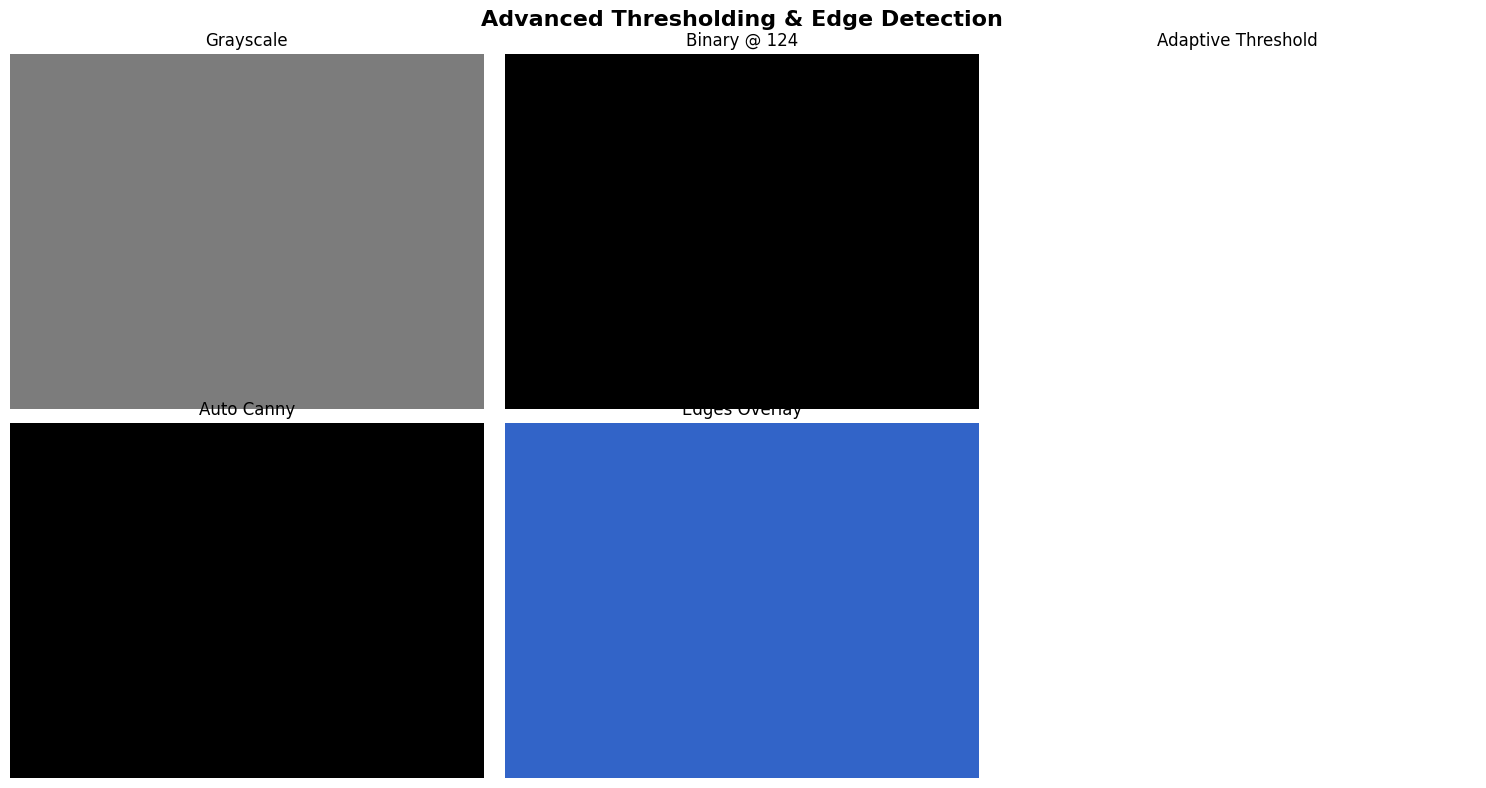

In [29]:
import cv2
import numpy as np


def threshold_by_percentile(gray_u8, pct=60):
    if not isinstance(gray_u8, np.ndarray) or gray_u8.ndim != 2:
        raise ValueError("gray_image must be a 2D NumPy array.")
    if gray_u8.dtype != np.uint8:
        raise ValueError("gray_image dtype must be uint8.")
    if not (1 <= pct <= 99):
        raise ValueError("percentile_value must be between 1 and 99.")

    cutoff = int(np.percentile(gray_u8, pct))
    _, binary_u8 = cv2.threshold(gray_u8, cutoff, 255, cv2.THRESH_BINARY)
    return cutoff, binary_u8

def canny_auto(gray_u8):
    if not isinstance(gray_u8, np.ndarray) or gray_u8.ndim != 2:
        raise ValueError("gray_image must be a 2D NumPy array.")
    middle = int(np.median(gray_u8))
    lo = max(0, int(0.66 * middle))
    hi = min(255, int(1.33 * middle))
    return cv2.Canny(gray_u8, lo, hi)

banner("Threshold + Edges (Enhanced)")

gray = cv2.cvtColor(saved_bgr, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5,5), 0)


picked_threshold, binary_mask = threshold_by_percentile(blurred, pct=62)


adaptive = cv2.adaptiveThreshold(
    blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)
edge_map = canny_auto(blurred)


edges_colored = saved_bgr.copy()
edges_colored[edge_map != 0] = [0, 0, 255] 

render_tiles(
    [
        ("Grayscale", gray, "gray"),
        (f"Binary @ {picked_threshold}", binary_mask, "gray"),
        ("Adaptive Threshold", adaptive, "gray"),
        ("Auto Canny", edge_map, "gray"),
        ("Edges Overlay", edges_colored, "rgb"),
    ],
    headline="Advanced Thresholding & Edge Detection",
    columns=3,
)



==================== Contour Detection ====================
No contours found.


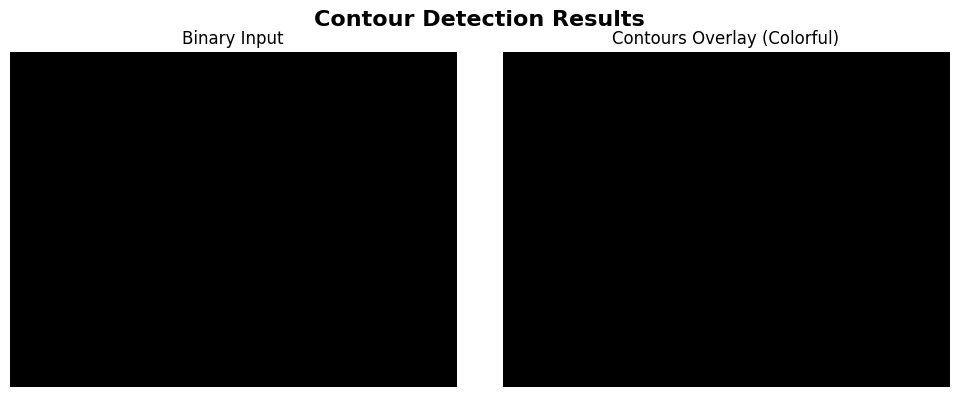

In [30]:
import cv2
import numpy as np

def collect_contour_metrics(binary_u8):
    if not isinstance(binary_u8, np.ndarray) or binary_u8.ndim != 2:
        raise ValueError("binary_image must be a 2D NumPy array.")

    contour_list, _ = cv2.findContours(binary_u8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rows = []
    for number, contour in enumerate(contour_list, start=1):
        area_value = cv2.contourArea(contour)
        perimeter_value = cv2.arcLength(contour, True)
        rows.append((number, round(area_value, 1), round(perimeter_value, 1)))
    return contour_list, rows

banner("Contour Detection")

contours, contour_rows = collect_contour_metrics(binary_mask)


contour_canvas = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
for idx, contour in enumerate(contours):
    color = tuple(np.random.randint(50, 255) for _ in range(3)) 
    cv2.drawContours(contour_canvas, [contour], -1, color, 2)

if contour_rows:
    print("ID | Area | Perimeter")
    for number, area_value, perimeter_value in contour_rows:
        print(f"{number:>2} | {area_value:>5} | {perimeter_value:>8}")
else:
    print("No contours found.")

render_tiles(
    [
        ("Binary Input", binary_mask, "gray"),
        ("Contours Overlay (Colorful)", cv2.cvtColor(contour_canvas, cv2.COLOR_BGR2RGB), "rgb"),
    ],
    headline="Contour Detection Results",
    columns=2,
)



==================== Face Detection Demo ====================
Cascade file used: c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml
Faces detected: 1


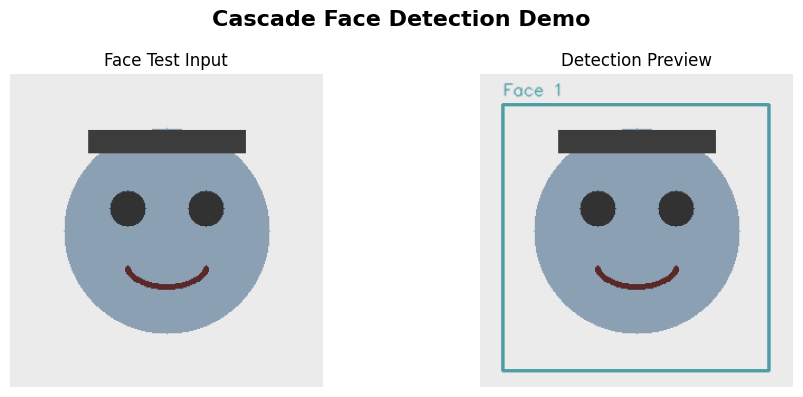

In [31]:
import cv2
import numpy as np
import os

def locate_face_cascade():
    possible_locations = (
        "haarcascade_frontalface_default.xml",
        "haarcascade_frontalface_default (1).xml",
        os.path.join(cv2.data.haarcascades, "haarcascade_frontalface_default.xml"),
    )
    matched_path = next((path for path in possible_locations if os.path.exists(path)), None)
    if matched_path is None:
        raise FileNotFoundError(
            "No face cascade XML file found in local folder or OpenCV data directory."
        )
    return matched_path

def run_face_detection(frame_bgr, cascade_xml):
    assert_bgr_uint8(frame_bgr, "input_bgr_image")
    if not isinstance(cascade_xml, str) or not cascade_xml.strip():
        raise ValueError("cascade_path must be a non-empty string.")

    model = cv2.CascadeClassifier(cascade_xml)
    if model.empty():
        raise RuntimeError(f"Cascade could not be loaded: {cascade_xml}")

    gray_frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)
    detections = model.detectMultiScale(
        gray_frame,
        scaleFactor=1.12,
        minNeighbors=4,
        minSize=(30, 30),
    )

    boxed = frame_bgr.copy()
    for idx, (x, y, w, h) in enumerate(detections):
        color = tuple(np.random.randint(50, 255) for _ in range(3)) 
        cv2.rectangle(boxed, (x, y), (x + w, y + h), color, 2)
        cv2.putText(boxed, f"Face {idx+1}", (x, y-8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)
    return boxed, detections

def build_face_test_image():
    sample = np.full((280, 280, 3), 235, dtype=np.uint8)
    
    cv2.circle(sample, (140, 140), 92, (180, 160, 140), -1)

    cv2.circle(sample, (105, 120), 16, (50, 50, 50), -1)
    cv2.circle(sample, (175, 120), 16, (50, 50, 50), -1)

    cv2.ellipse(sample, (140, 170), (36, 20), 0, 10, 170, (40, 40, 90), 3)

    cv2.rectangle(sample, (70, 50), (210, 70), (60, 60, 60), -1)
    return sample

banner("Face Detection Demo")

cascade_file = locate_face_cascade()
face_input_bgr = build_face_test_image()
face_result_image, face_boxes = run_face_detection(face_input_bgr, cascade_file)

print(f"Cascade file used: {cascade_file}")
print(f"Faces detected: {len(face_boxes)}")

render_tiles(
    [
        ("Face Test Input", cv2.cvtColor(face_input_bgr, cv2.COLOR_BGR2RGB), "rgb"),
        ("Detection Preview", cv2.cvtColor(face_result_image, cv2.COLOR_BGR2RGB), "rgb"),
    ],
    headline="Cascade Face Detection Demo",
    columns=2,
)


In [32]:
banner("Final Snapshot - OpenCV Summary")

summary_tiles = []

try:
    summary_tiles.append(
        ("Original Image", cv2.cvtColor(saved_bgr, cv2.COLOR_BGR2RGB), "rgb")
    )
except NameError:
    print("Warning: saved_bgr not found, skipping Original Image.")

try:
    summary_tiles.append(("Edge Map", edge_map, "gray"))
except NameError:
    print("Warning: edge_map not found, skipping Edge Map.")

try:
    summary_tiles.append(
        ("Contours Overlay", cv2.cvtColor(contour_canvas, cv2.COLOR_BGR2RGB), "rgb")
    )
except NameError:
    print("Warning: contour_canvas not found, skipping Contours Overlay.")

try:
    summary_tiles.append(
        ("Face Detection", cv2.cvtColor(face_result_image, cv2.COLOR_BGR2RGB), "rgb")
    )
except NameError:
    print("Warning: face_result_image not found, skipping Face Detection.")

if summary_tiles:
    render_tiles(
        summary_tiles,
        headline="OpenCV Core Functions - Final Dashboard",
        columns=2,
    )
else:
    print("No images available to display in the final snapshot.")

print("Notebook Status:  All core OpenCV tasks completed successfully.")



==================== Final Snapshot - OpenCV Summary ====================


Notebook Status:  All core OpenCV tasks completed successfully.


In [33]:
banner("OpenCV Final Snapshot - Dashboard")

summary_tiles = []

def add_tile(title, img, mode="rgb"):
    """Helper to safely add a tile if the image exists"""
    try:
        if mode == "rgb":
            summary_tiles.append((title, cv2.cvtColor(img, cv2.COLOR_BGR2RGB), "rgb"))
        else:
            summary_tiles.append((title, img, mode))
    except Exception as e:
        print(f"Warning: Could not add '{title}' - {e}")
add_tile("Original Image", saved_bgr) if 'saved_bgr' in globals() else None
add_tile("Edge Map", edge_map, "gray") if 'edge_map' in globals() else None
add_tile("Contours Overlay", contour_canvas) if 'contour_canvas' in globals() else None
add_tile("Face Detection", face_result_image) if 'face_result_image' in globals() else None

if summary_tiles:
    render_tiles(
        summary_tiles,
        headline="OpenCV Main Functions - Summary Dashboard",
        columns=2
    )
else:
    print("No images available for the final snapshot.")

print("\n✅ Notebook Status: Core OpenCV tasks completed successfully.\n")



==================== OpenCV Final Snapshot - Dashboard ====================



✅ Notebook Status: Core OpenCV tasks completed successfully.

